In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [32]:
Data = pd.read_csv('Carseats.csv')
Data.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [33]:
Data.shape

(400, 12)

In [34]:
# dropping Unnamed:0 column
Data.drop(Data.columns[0],axis = 1,inplace = True)

In [35]:
Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [36]:
# check for missing values
Data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [37]:
# checking for categorical variables
Data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

Unique values in ShelveLoc = ['Bad' 'Good' 'Medium']
Unique values in Urban = ['Yes' 'No']
Unique values in US = ['Yes' 'No']


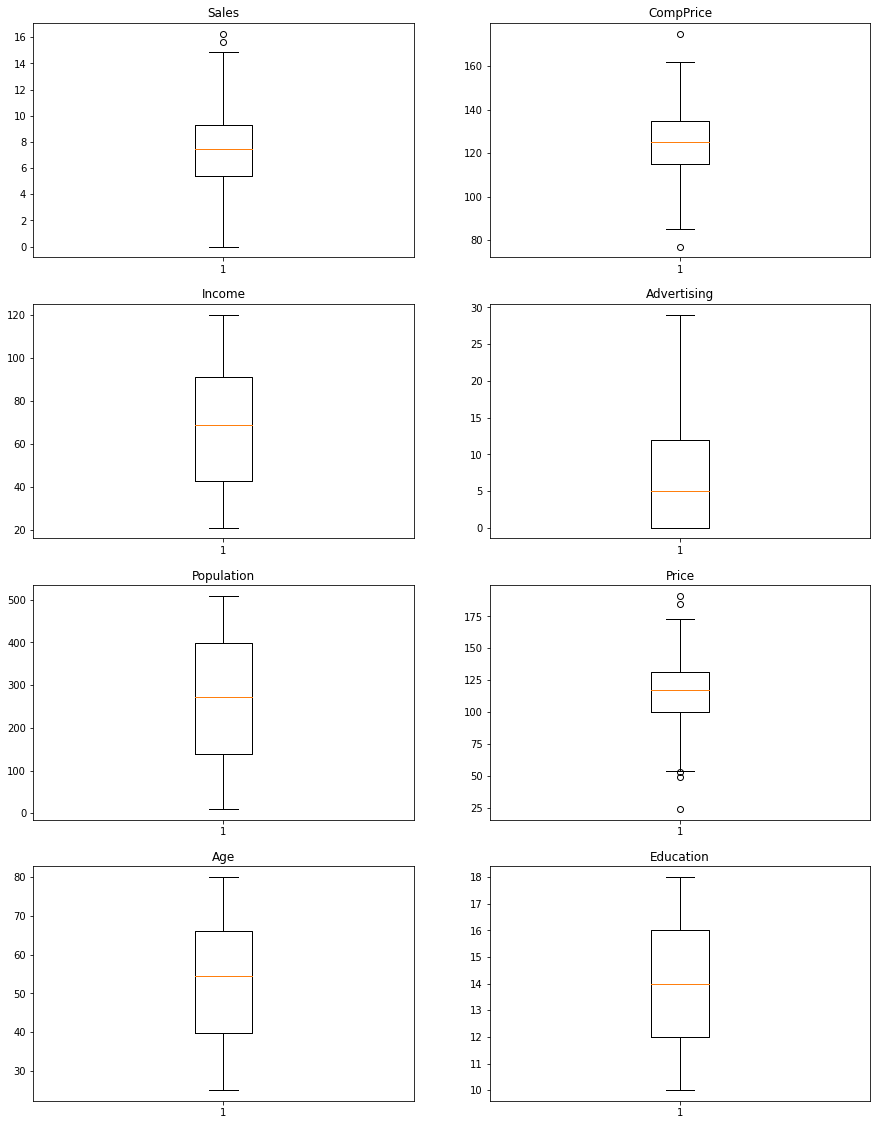

In [38]:
#cheking the unique values in each categorical columns
#also checking for outliers in non categorical columns
plt.figure(figsize=(15,25))
count = 1
for col in Data:
  if(Data[col].dtype == 'O'):
    print("Unique values in {} = {}".format(col,Data[col].unique()))
  else:
    plt.subplot(5,2,count)
    plt.boxplot(Data[col])
    plt.title(col)
    count += 1
plt.show()

In [39]:
Data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [40]:
df = Data.copy()
df['ShelveLoc'].head()

0       Bad
1      Good
2    Medium
3    Medium
4       Bad
Name: ShelveLoc, dtype: object

In [41]:
# applying label encoding on Shelveloc column
My_dict = {
    'Bad':0,
    'Medium':1,
    'Good':2
}
df['ShelveLoc_new'] =df['ShelveLoc'].map(My_dict)
df['ShelveLoc_new'].head()

0    0
1    2
2    1
3    1
4    0
Name: ShelveLoc_new, dtype: int64

In [42]:
# droping old column
df.drop('ShelveLoc',axis = 1,inplace=True)

In [43]:
# one hot encoding the other two columns and droping the first two row
df = pd.get_dummies(df,drop_first=True)

In [44]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_new,Urban_Yes,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,0.554458,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,0.038549,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,-0.053465,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,0.056552,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,-0.020614,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,0.050924,0.047016,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,0.014149,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,-0.025723,-0.033094,-0.078250
ShelveLoc_new,0.554458,0.038549,-0.053465,0.056552,-0.020614,0.050924,0.014149,-0.025723,1.000000,-0.075404,0.047378
Urban_Yes,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,0.028479,-0.033094,-0.075404,1.000000,0.047085


In [45]:
df.dtypes

Sales            float64
CompPrice          int64
Income             int64
Advertising        int64
Population         int64
Price              int64
Age                int64
Education          int64
ShelveLoc_new      int64
Urban_Yes          uint8
US_Yes             uint8
dtype: object

In [46]:
# spplit x and y
x= df.iloc[:,1:].values
y= df.iloc[:,0].values

In [47]:
x.shape, y.shape

((400, 10), (400,))

In [48]:
y = y.reshape(-1,1)

In [49]:
# splitting into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [52]:
# fitting the training data
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# predictions
y_pred = model.predict(x_test)

In [54]:
# checking the r2score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8001916791084241